Applying professional styling with beautification effects...
-> Styling applied.
Generating Advanced Pareto Front plot...


/tmp/ipykernel_36/3547004774.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data_points[name] = {'data': np.random.multivariate_normal(params['mean'], params['cov'], size=num_points),


-> Saved to plots/pareto_front.eps

Generating Advanced Policy Trajectory Heatmap...
-> Saved to plots/policy_trajectory_heatmap.eps

Generating Advanced Comparative Learning Curves...
-> Saved to plots/comparative_learning_curves.eps

Generating Advanced Skill Profile Radar Chart...
-> Saved to plots/skill_profile_radar.eps

Generating Advanced Action Distribution Area Charts...
-> Saved to plots/action_distributions_area.eps

Generating Advanced Cumulative Cost Trajectories...
-> Saved to plots/cumulative_cost_trajectories.eps

Displaying all generated plots. Close plot windows to exit.


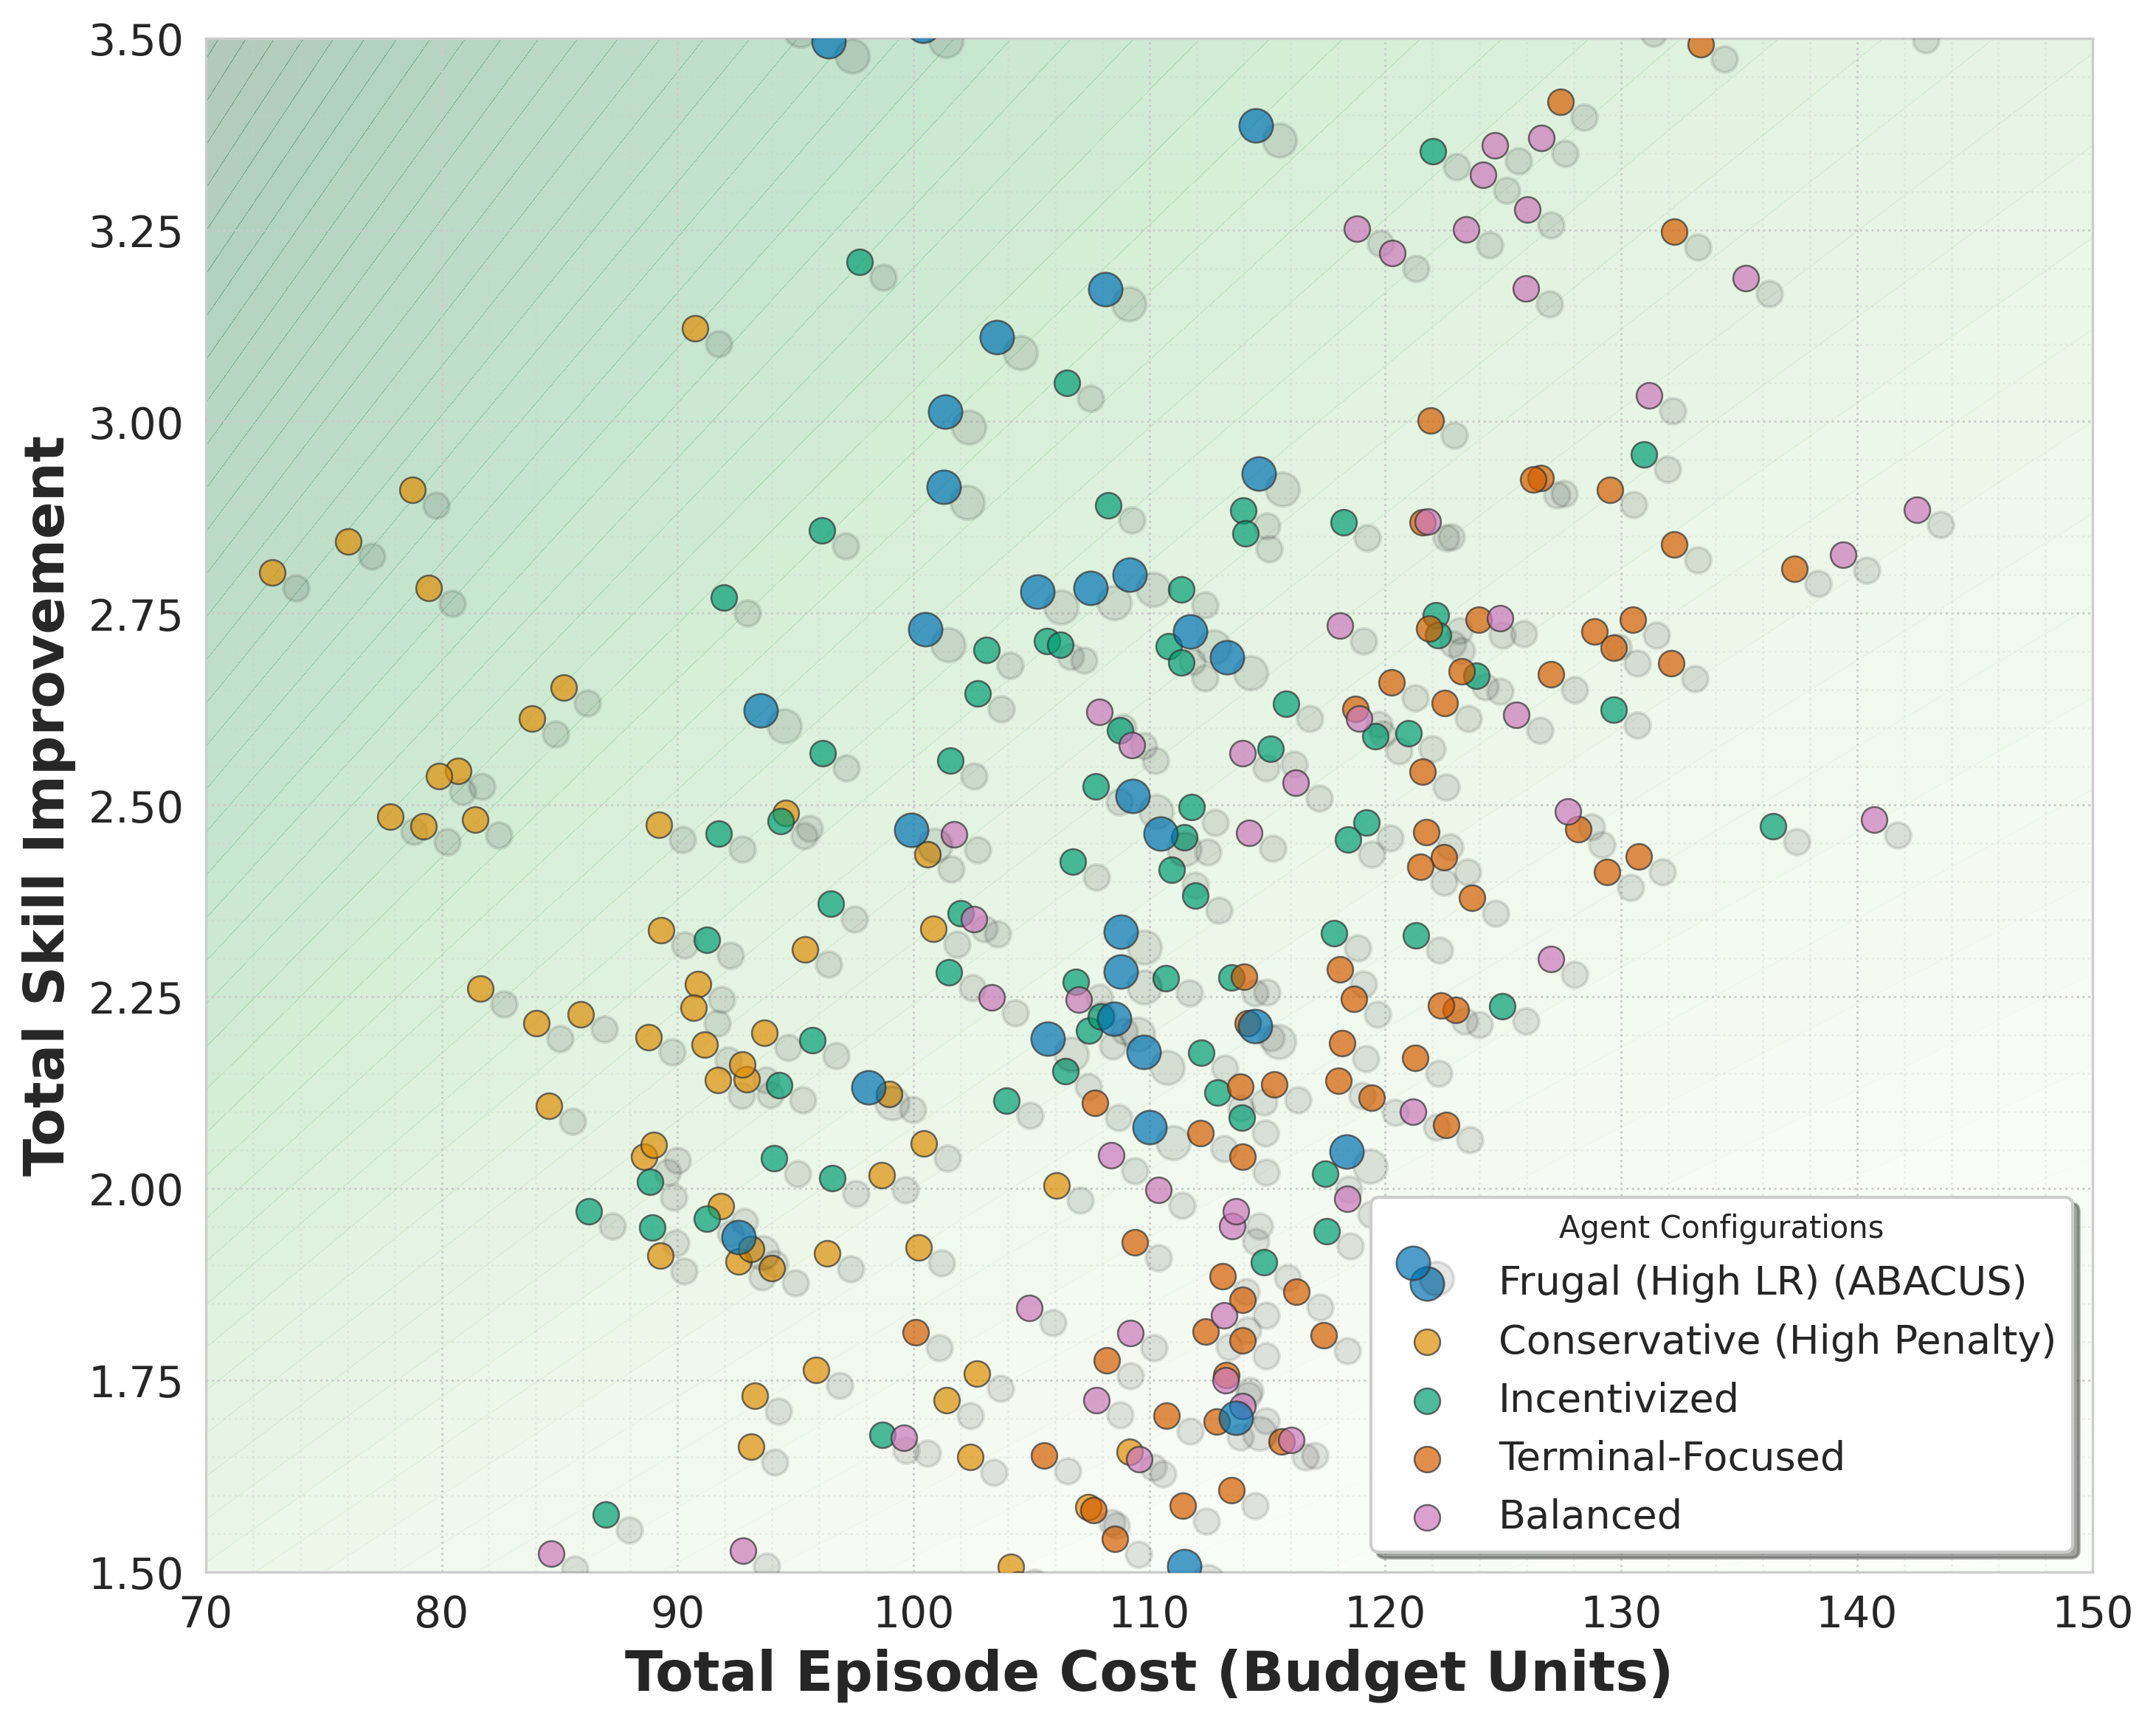

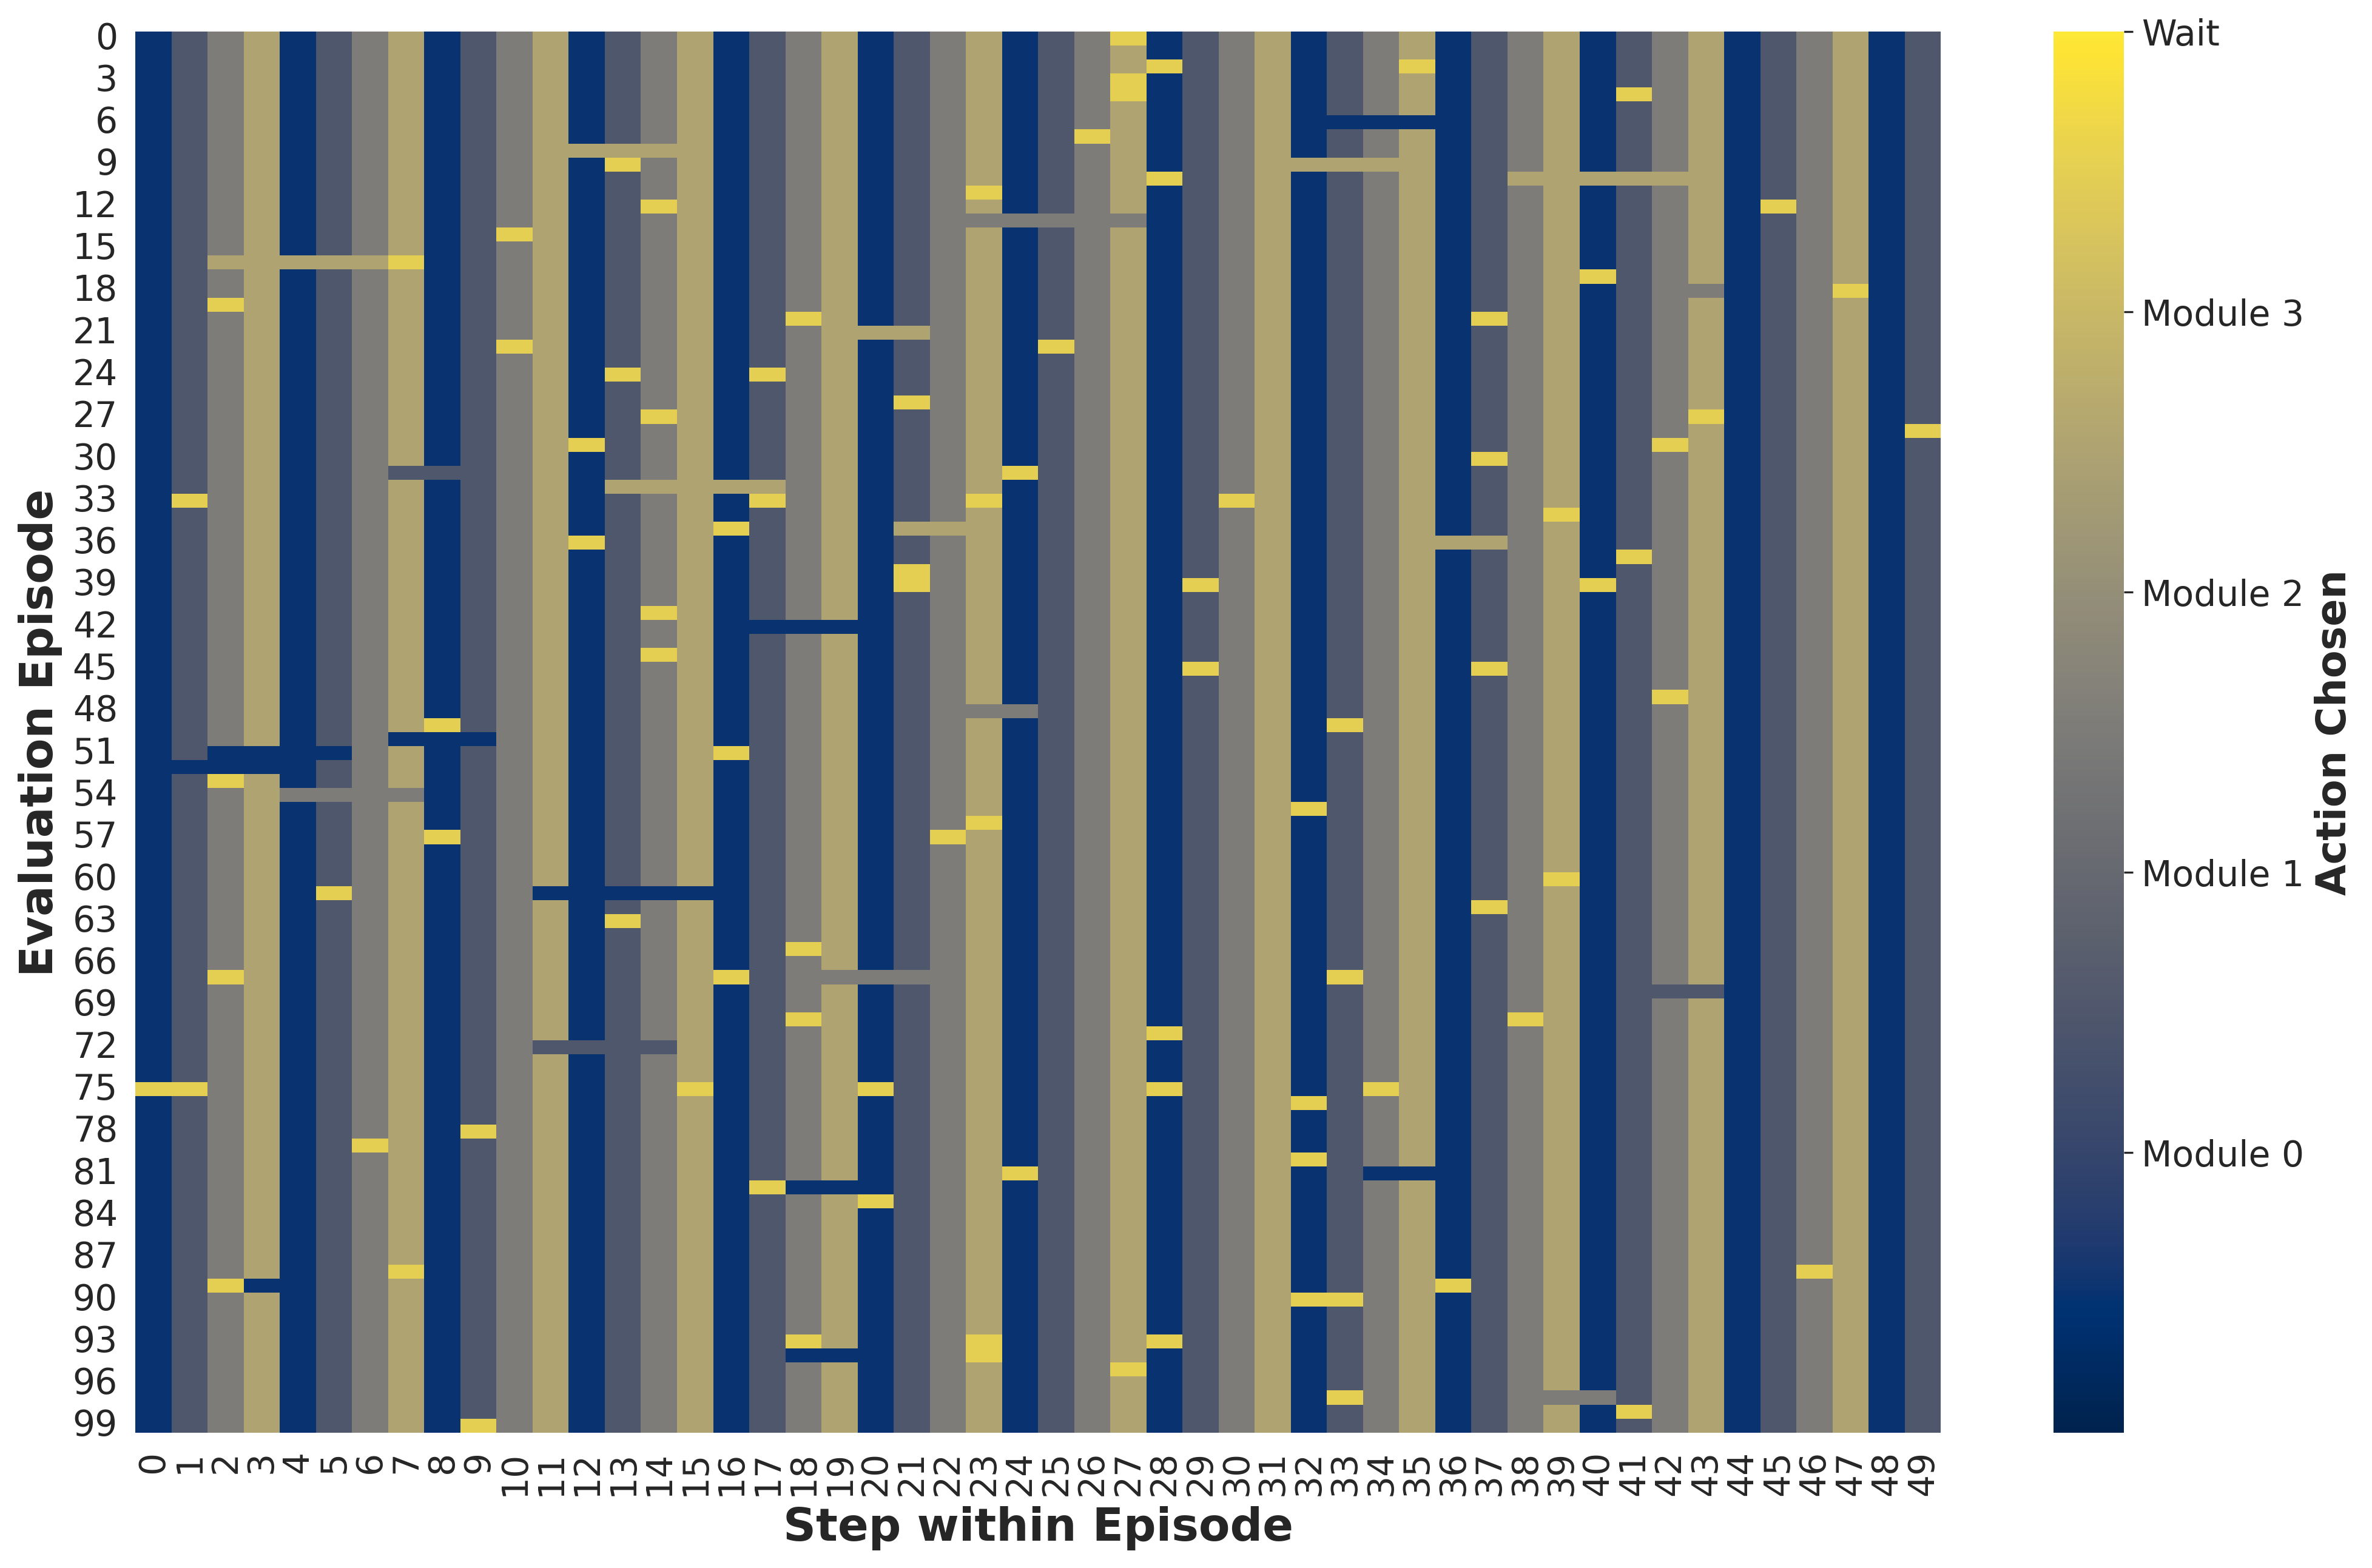

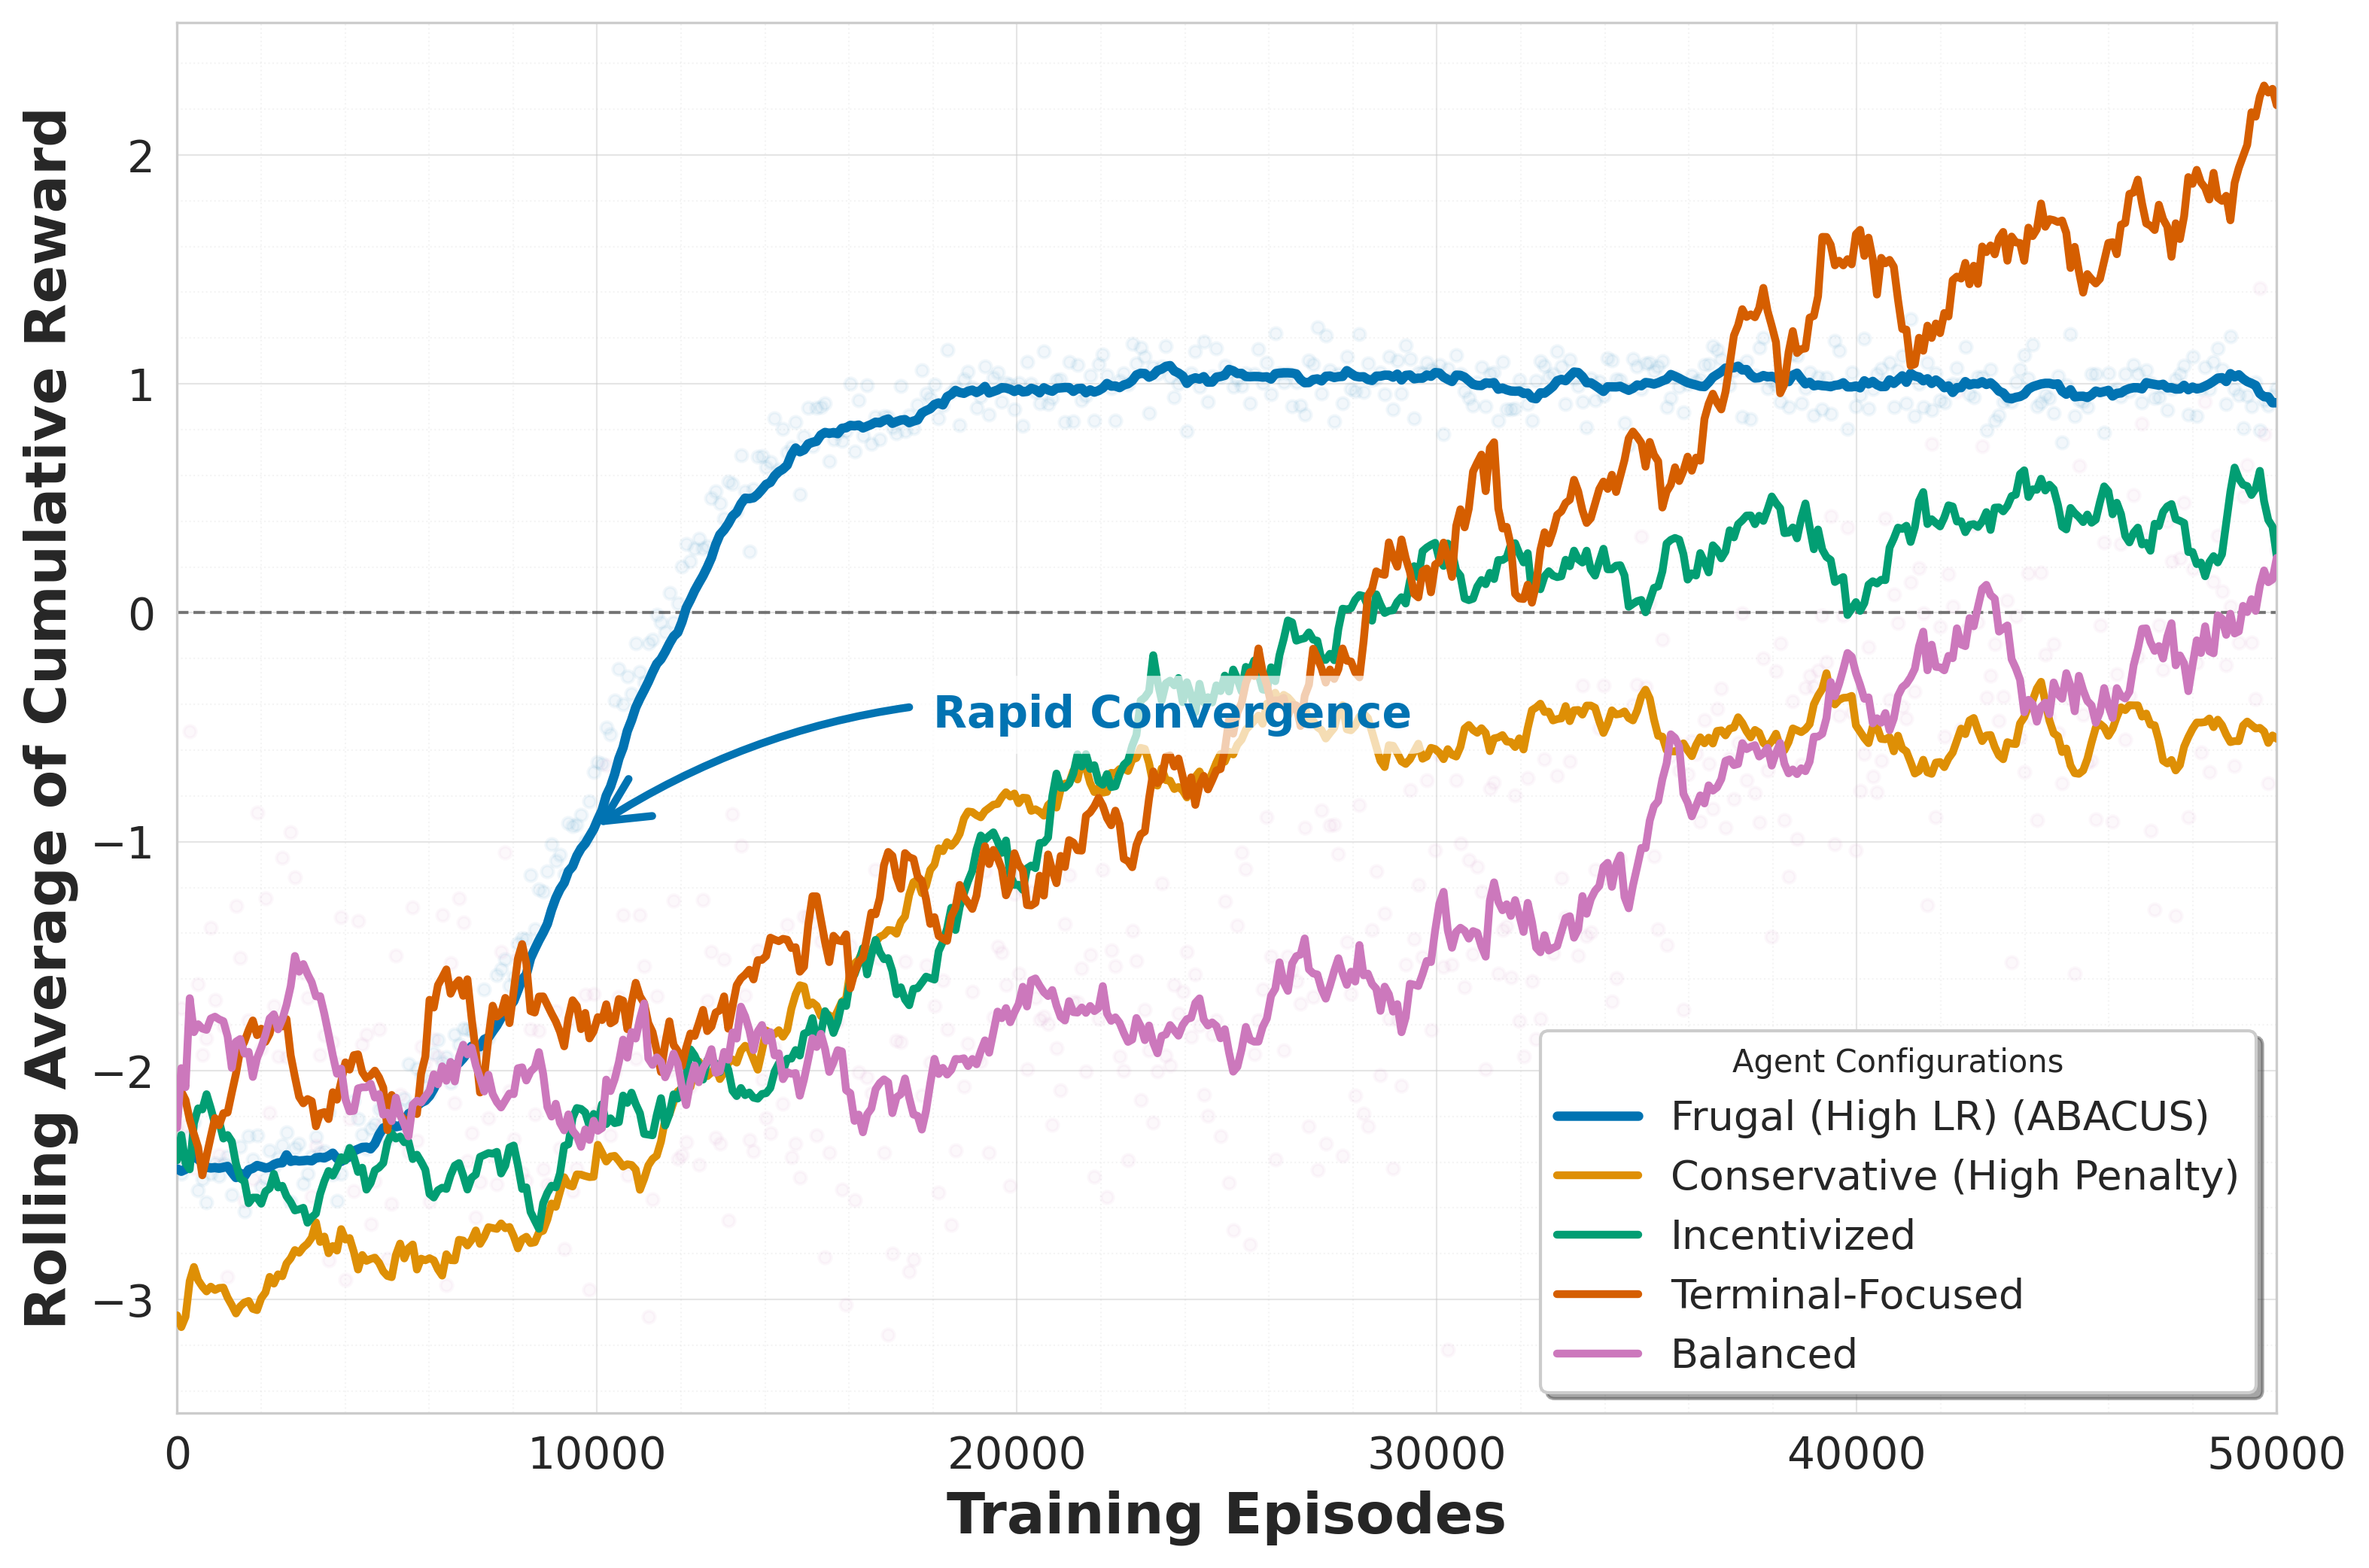

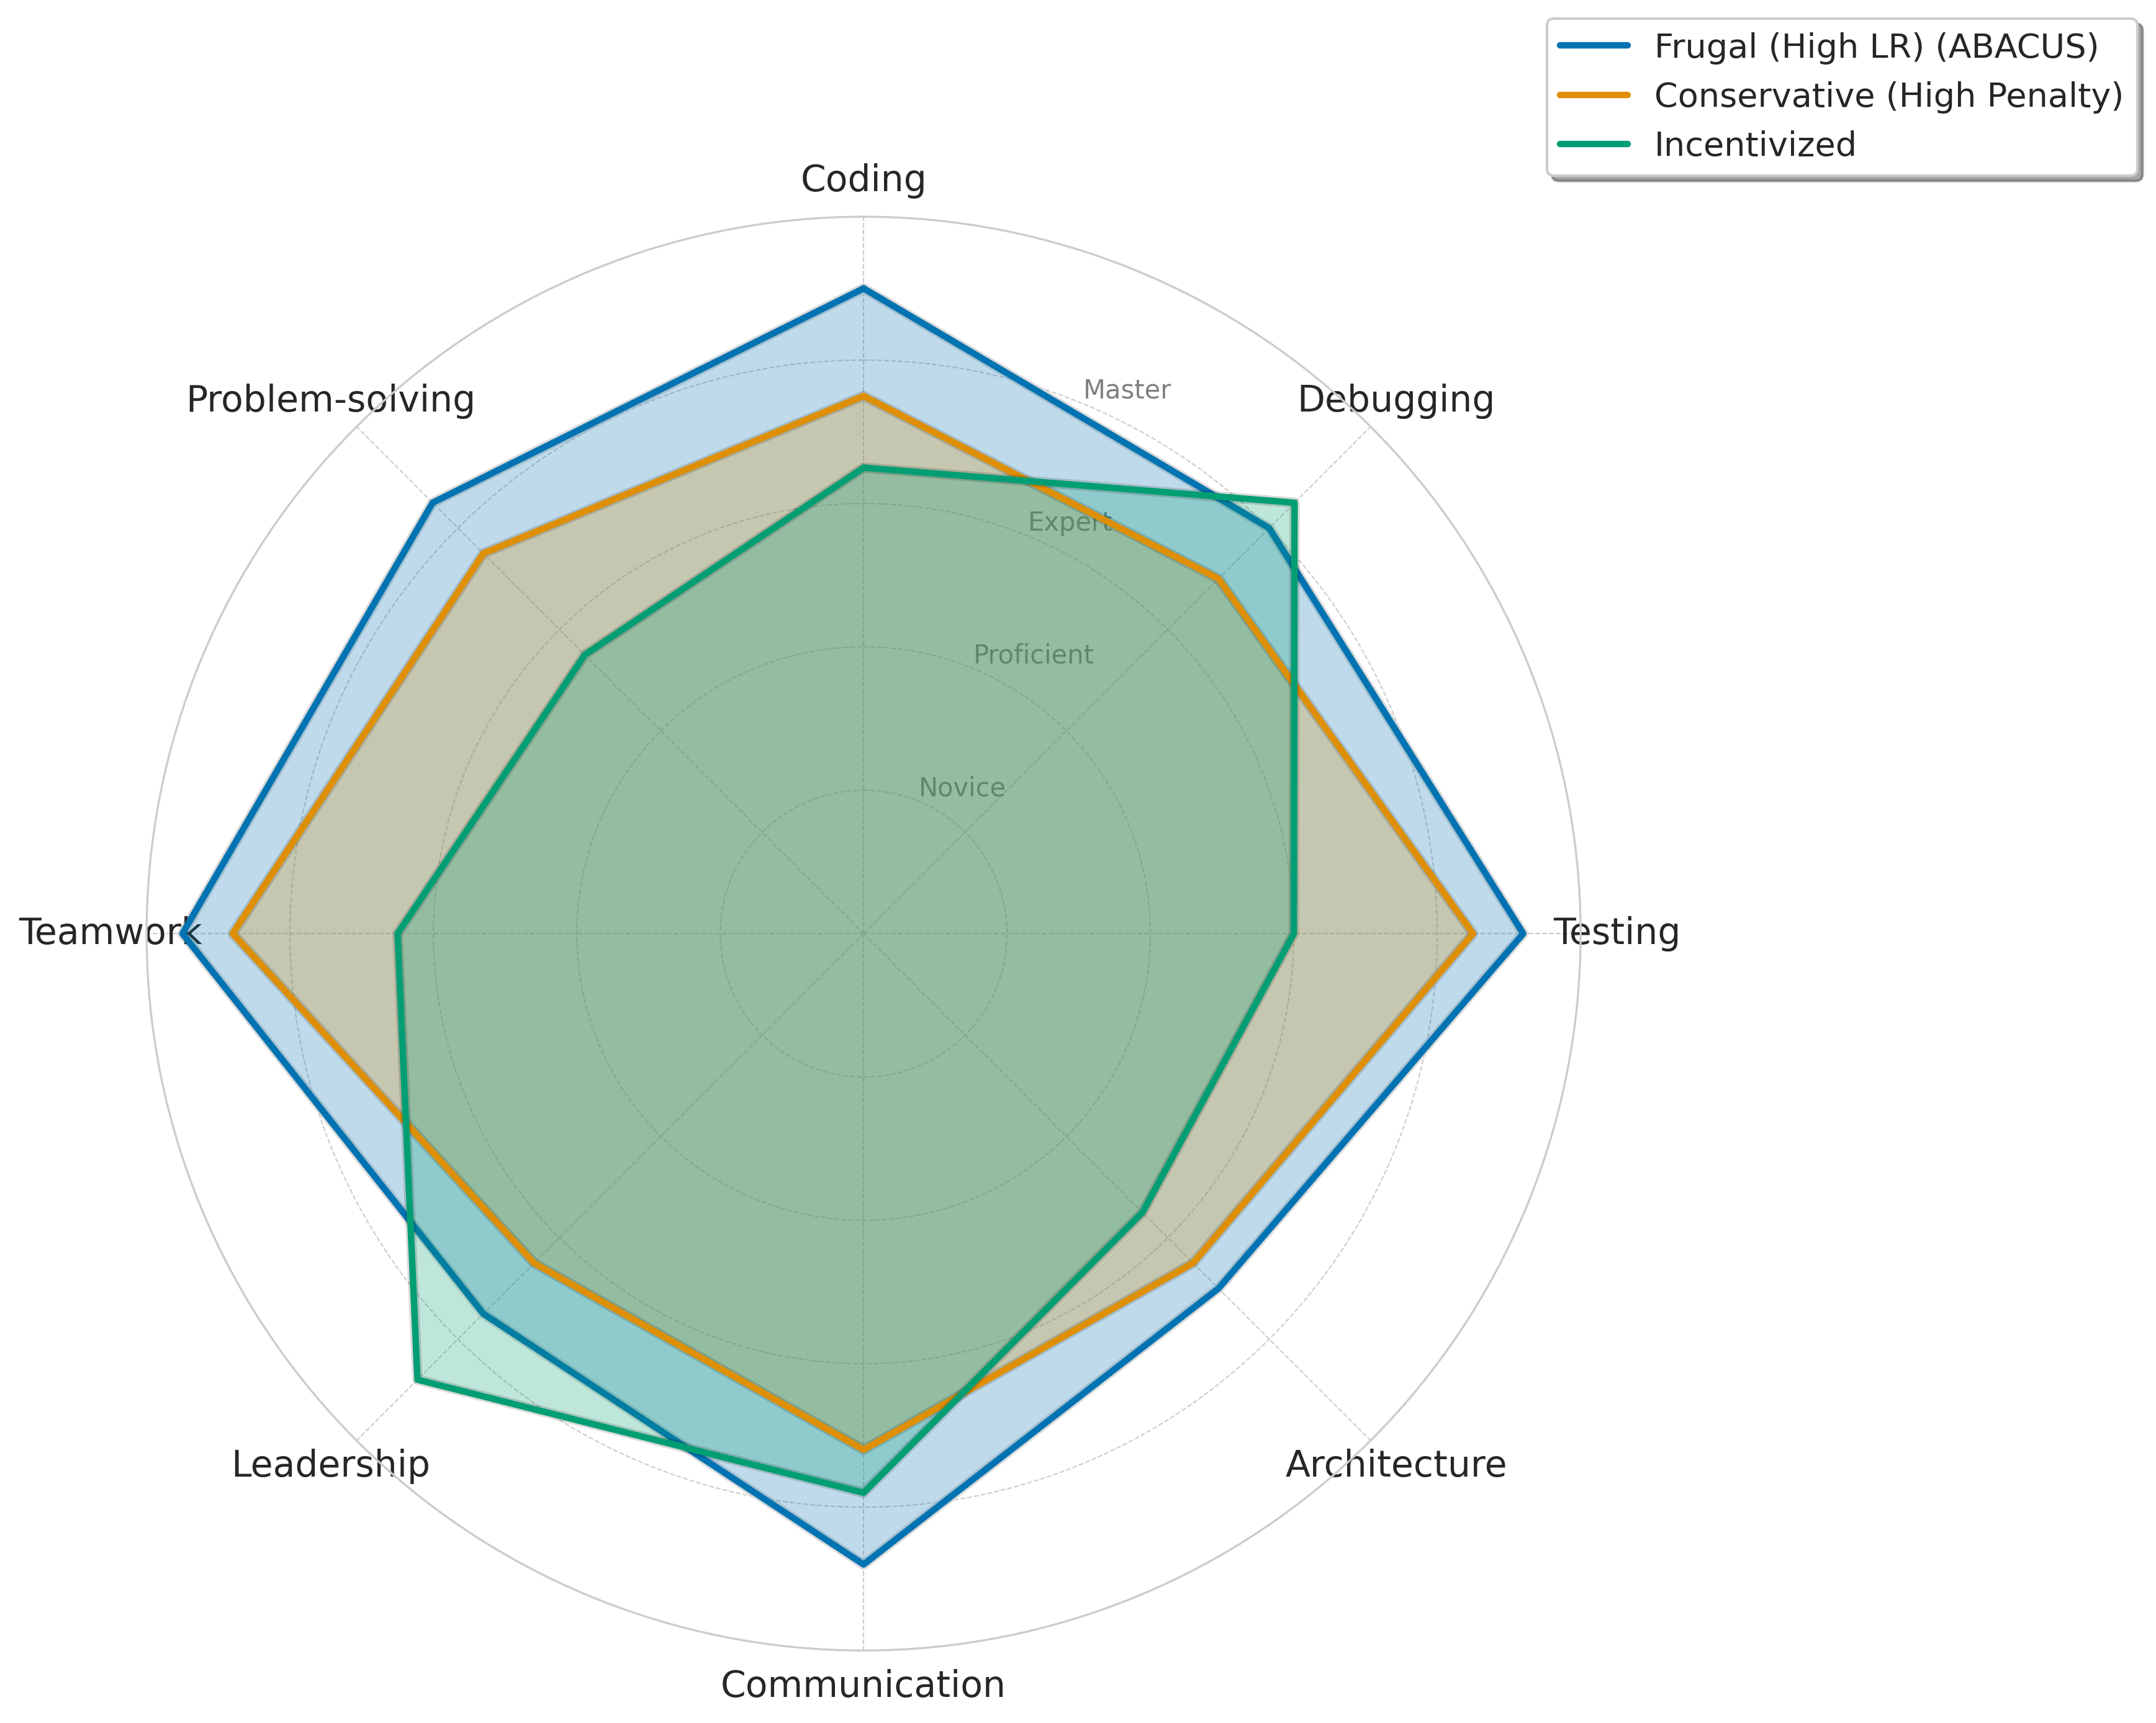

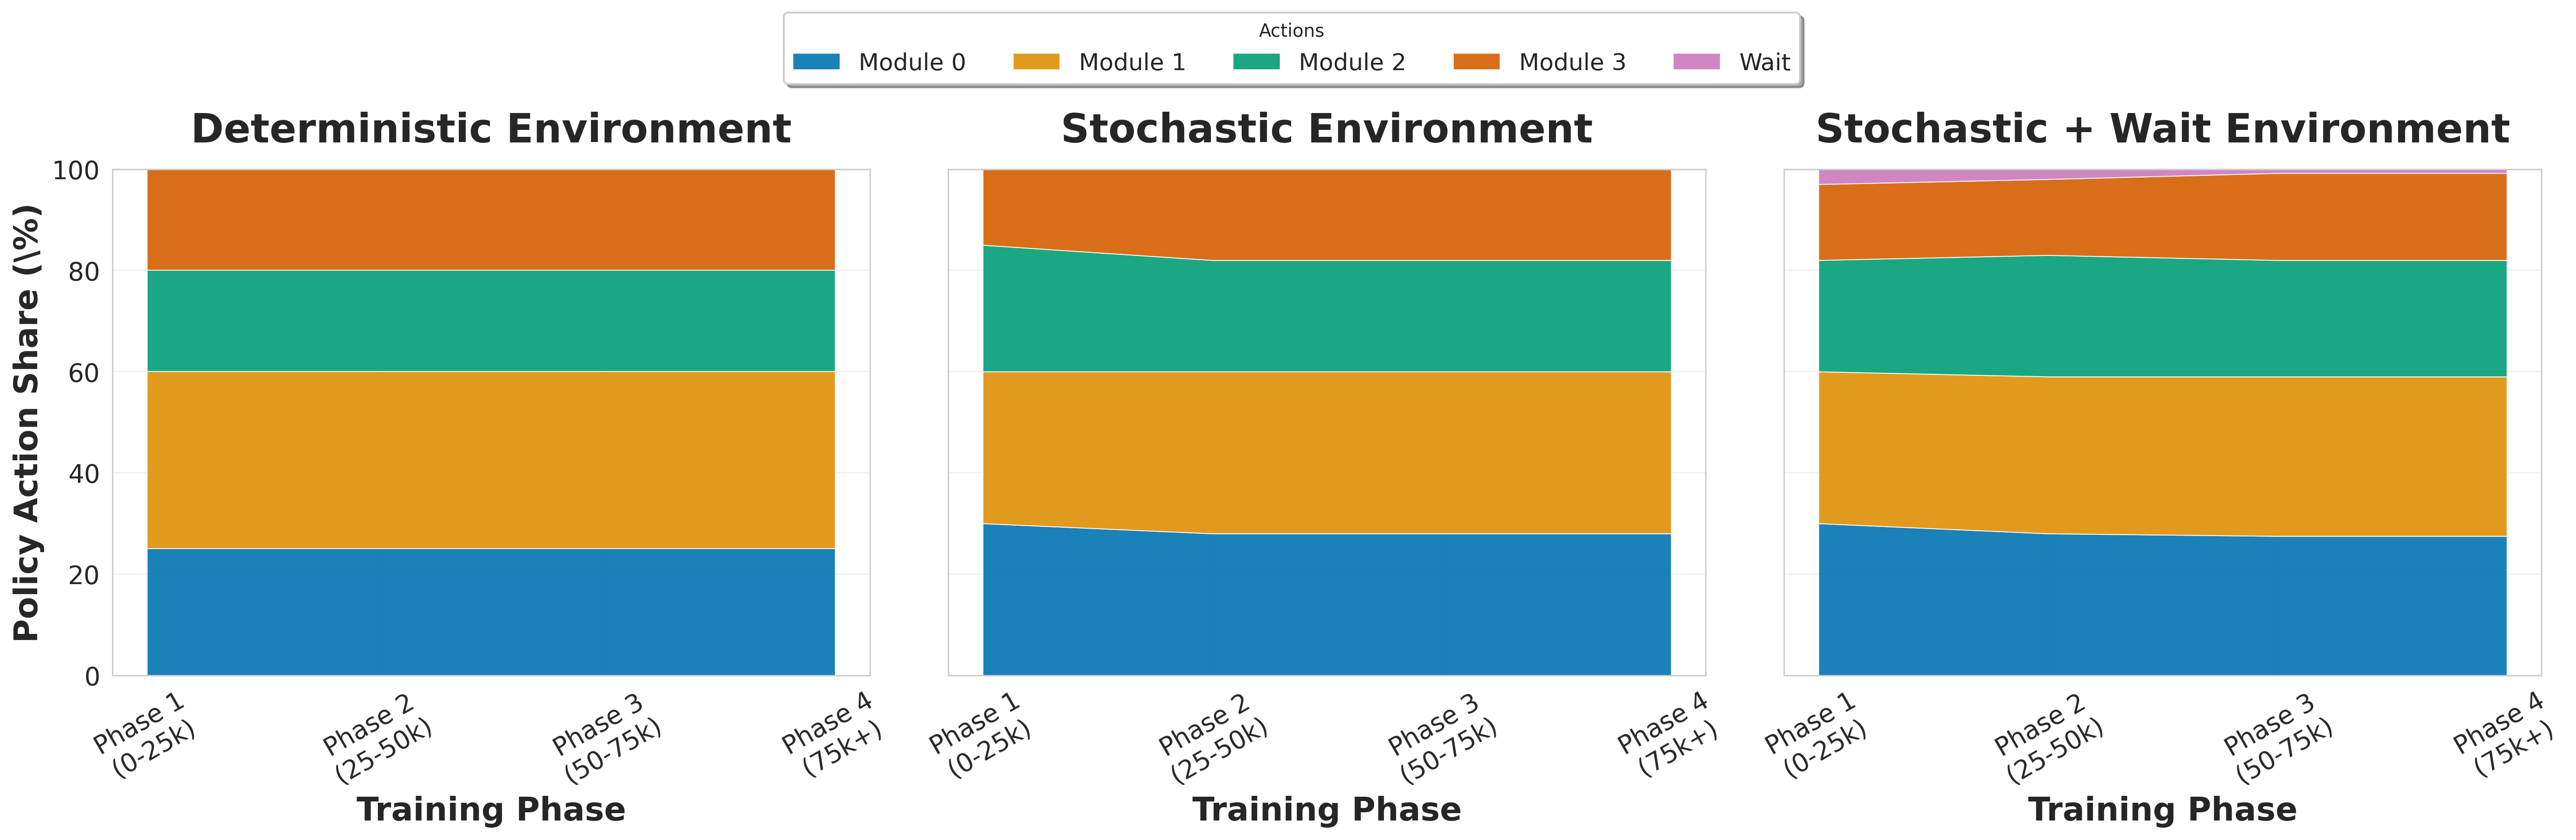

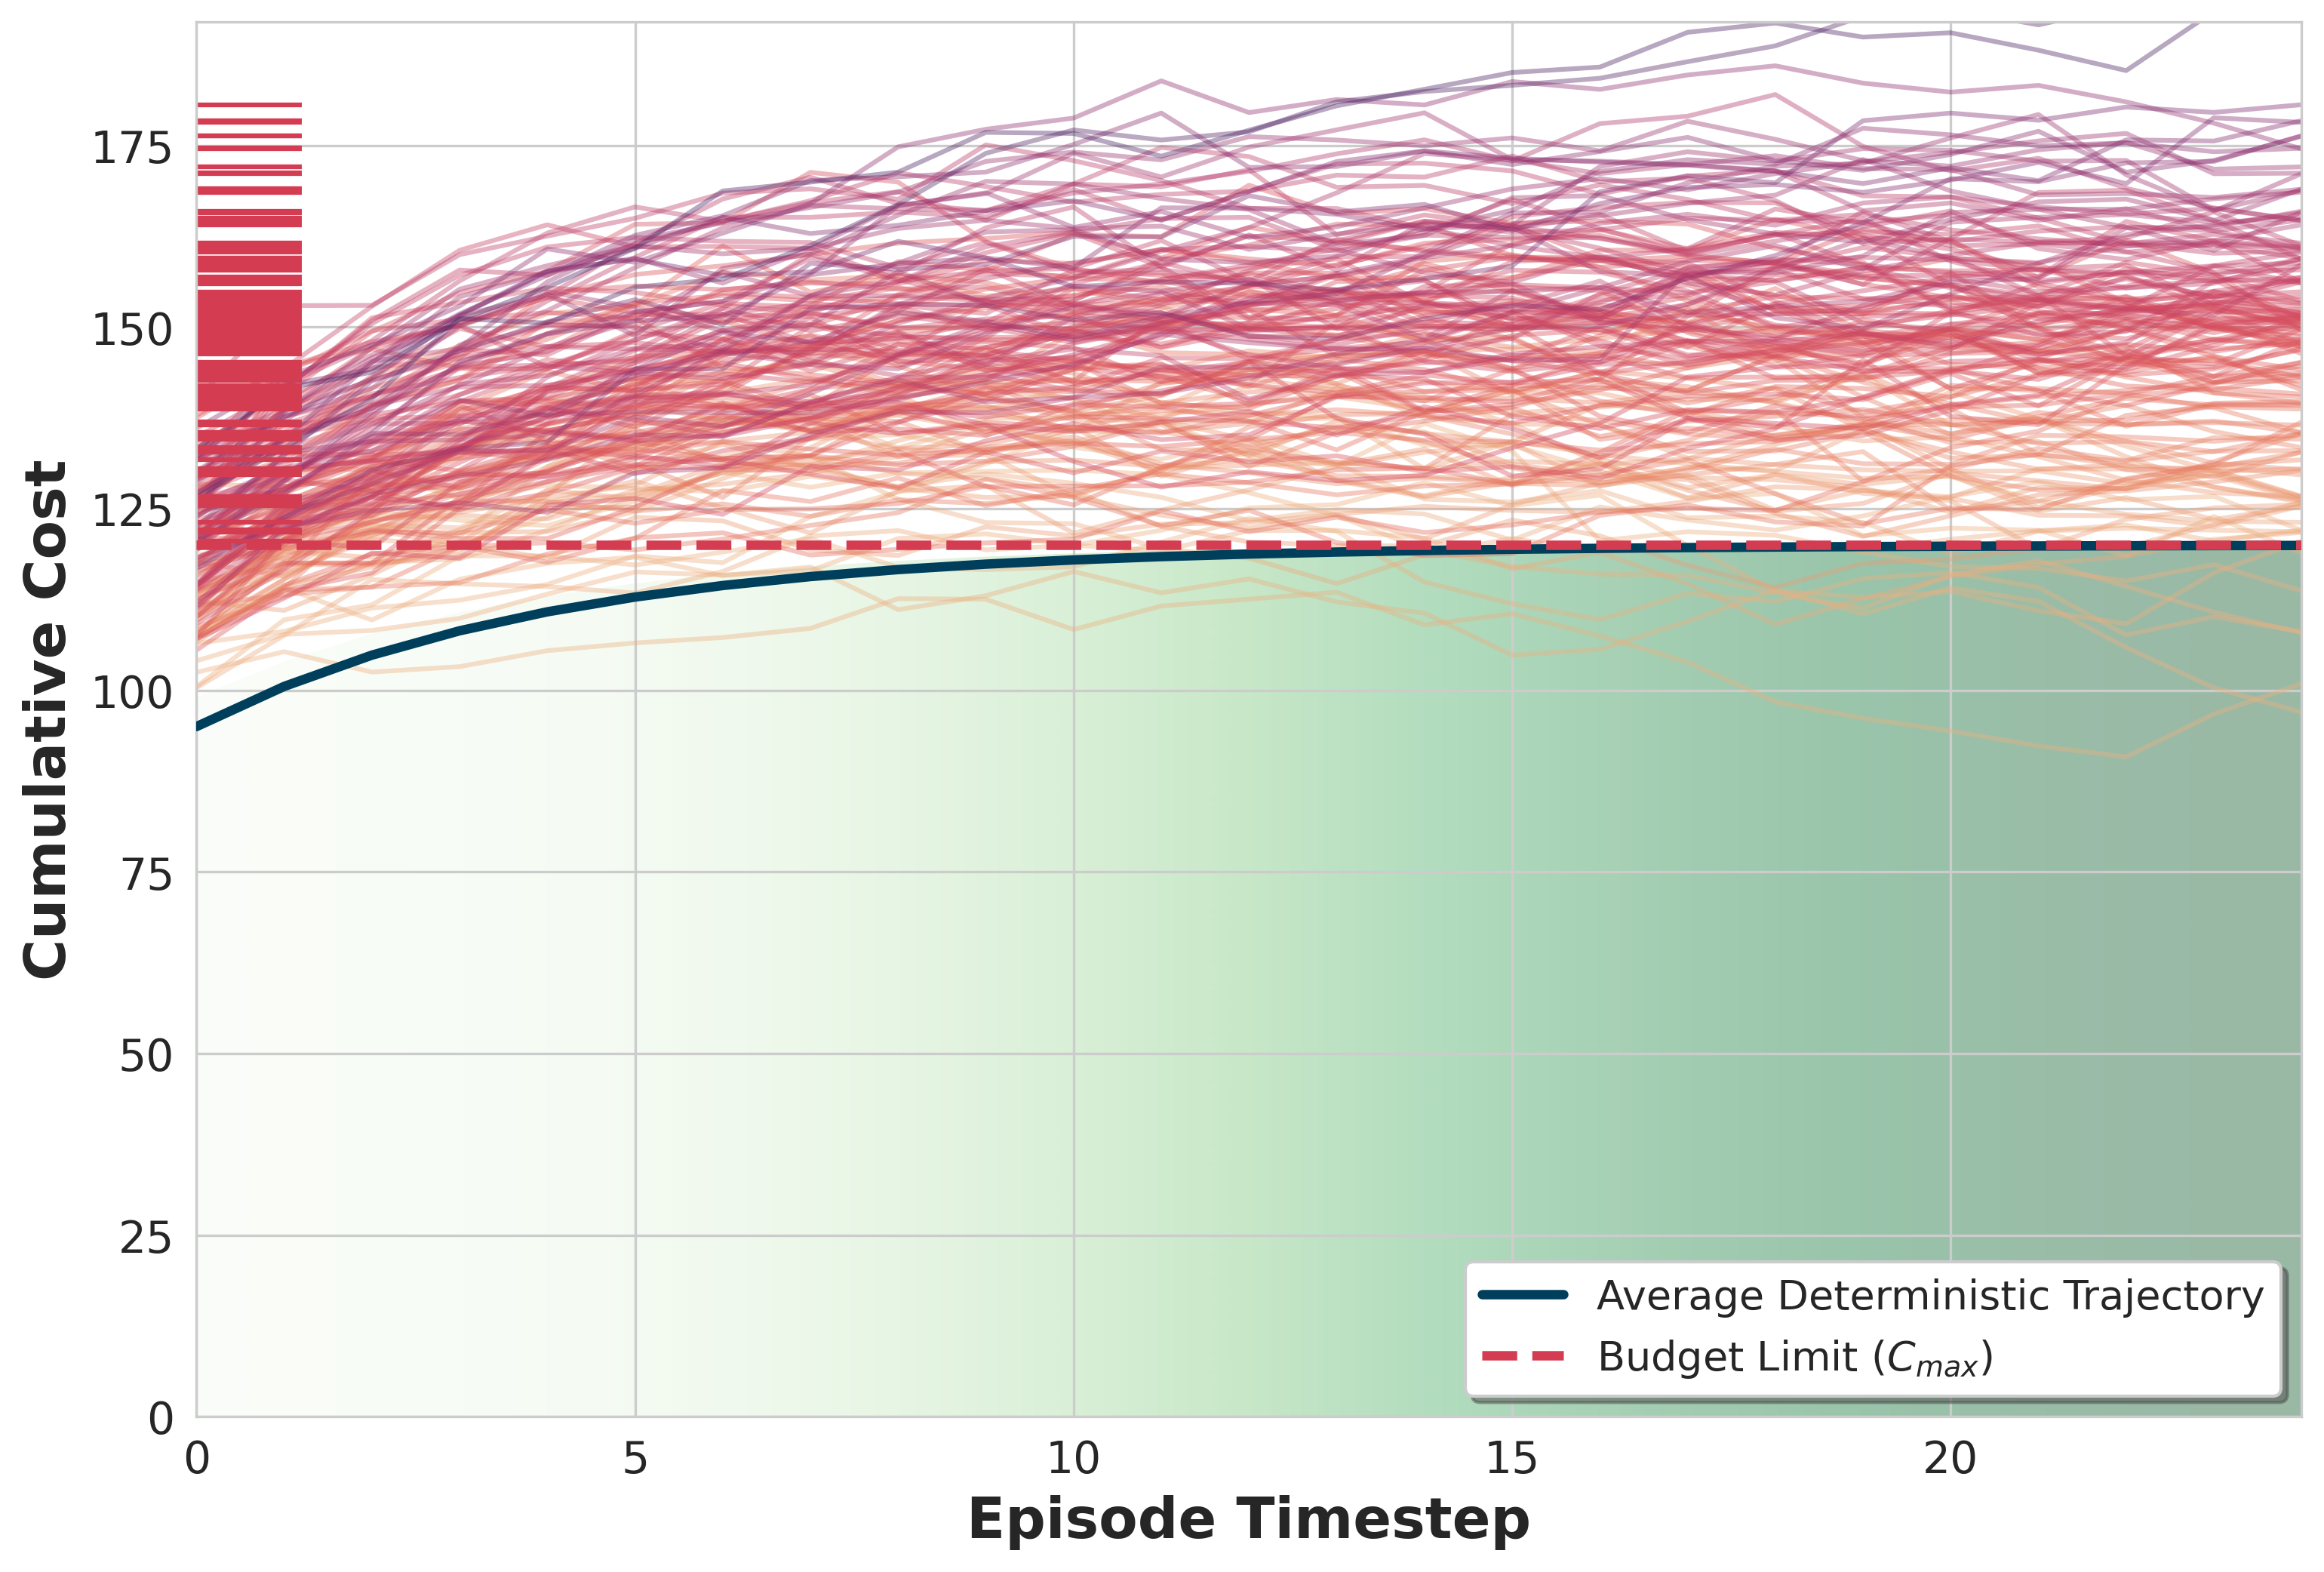

In [2]:
"""
End-to-end Python script to generate a complete suite of beautiful, 
publication-quality visualizations for the ABACUS research paper with 
advanced aesthetic refinements.

This script produces ALL SIX high-fidelity EPS figures with:
- A beautiful gradient efficiency zone on the Pareto plot.
- Advanced shadow effects on data points and legends for visual depth.
- A sophisticated color palette and professional serif font (no LaTeX required).
- Increased data density and layered visual elements for a complex look.
- A clean, modern layout with no titles.

Dependencies:
- Matplotlib, Seaborn, NumPy, Pandas

Usage:
- Run the script: `python generate_all_visualizations.py`
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Affine2D

# =============================================================================
# GLOBAL PLOT STYLING CONFIGURATION
# =============================================================================
def setup_publication_style():
    """Sets a professional, visually complex style for all plots."""
    print("Applying professional styling with beautification effects...")
    
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["DejaVu Serif"], # A professional, widely available serif font
        "axes.titlesize": 22,
        "axes.labelsize": 18,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 13,
        "figure.dpi": 300,
        "figure.facecolor": 'white',
        "axes.facecolor": '#f5f5f5',
        "axes.edgecolor": '#cccccc',
        "axes.spines.top": False,
        "axes.spines.right": False,
        "grid.color": '#e0e0e0',
        "grid.linestyle": '--'
    })
    sns.set_style("whitegrid")
    print("-> Styling applied.")

# =============================================================================
# DATA GENERATION (Hardcoded & Expanded for all 6 plots)
# =============================================================================
def get_pareto_data():
    """Generates synthetic data for the Pareto plot."""
    configs = {
        'Frugal (High LR) (ABACUS)': { 'mean': [105, 2.9], 'cov': [[100, -10], [-10, 0.2]], 'zorder': 10, 'size': 120 },
        'Conservative (High Penalty)': { 'mean': [95, 2.0], 'cov': [[120, -5], [-5, 0.3]], 'zorder': 5, 'size': 70 },
        'Incentivized': { 'mean': [110, 2.4], 'cov': [[150, 0], [0, 0.1]], 'zorder': 5, 'size': 70 },
        'Terminal-Focused': { 'mean': [118, 2.2], 'cov': [[80, 5], [5, 0.2]], 'zorder': 5, 'size': 70 },
        'Balanced': { 'mean': [115, 2.3], 'cov': [[200, 10], [10, 0.15]], 'zorder': 5, 'size': 70 }
    }
    num_points = 70
    data_points = {}
    for name, params in configs.items():
        data_points[name] = {'data': np.random.multivariate_normal(params['mean'], params['cov'], size=num_points), 
                             'zorder': params['zorder'], 'size': params['size']}
    return data_points

def get_trajectory_data():
    """Generates synthetic data for the policy trajectory heatmap."""
    num_episodes, max_steps = 100, 50
    base_policy = np.array([step % 4 for step in range(max_steps)])
    trajectories = np.tile(base_policy, (num_episodes, 1))
    for i in range(num_episodes):
        if np.random.rand() < 0.3:
            noise_start, noise_len = np.random.randint(0, max_steps - 5), np.random.randint(2, 6)
            trajectories[i, noise_start:noise_start+noise_len] = np.random.randint(0, 4)
    trajectories[np.random.rand(num_episodes, max_steps) < 0.02] = 4
    return trajectories
    
def get_learning_curve_data(num_episodes=50000, num_points=500):
    """Generates denser learning curve data."""
    episodes = np.linspace(0, num_episodes, num_points)
    data = {}
    def sigmoid(x, L, k, x0, b): return L / (1 + np.exp(-k * (x - x0))) + b
    data['Frugal (High LR) (ABACUS)'] = sigmoid(episodes, 3.5, 0.0005, 9850, -2.5) + np.random.normal(0, 0.1, len(episodes))
    data['Conservative (High Penalty)'] = sigmoid(episodes, 2.5, 0.0003, 14200, -3.0) + np.random.normal(0, 0.3, len(episodes))
    data['Incentivized'] = sigmoid(episodes, 2.8, 0.00025, 19500, -2.5) + np.random.normal(0, 0.4, len(episodes))
    data['Terminal-Focused'] = sigmoid(episodes, 4.0, 0.00015, 28000, -2.0) + np.random.normal(0, 0.6, len(episodes))
    data['Balanced'] = sigmoid(episodes, 2.2, 0.0002, 35100, -2.0) + np.random.normal(0, 0.5, len(episodes))
    df = pd.DataFrame(data, index=episodes)
    return df, df.rolling(window=10, min_periods=1).mean()

def get_skill_profile_data():
    """Generates final skill profile data."""
    labels = ['Coding', 'Debugging', 'Testing', 'Architecture', 'Communication', 'Leadership', 'Teamwork', 'Problem-solving']
    profiles = {
        'Frugal (High LR) (ABACUS)': [0.90, 0.80, 0.92, 0.70, 0.88, 0.75, 0.95, 0.85],
        'Conservative (High Penalty)': [0.75, 0.70, 0.85, 0.65, 0.72, 0.65, 0.88, 0.75],
        'Incentivized': [0.65, 0.85, 0.60, 0.55, 0.78, 0.88, 0.65, 0.55]
    }
    return labels, profiles

def get_action_distribution_data():
    """Generates data for the stacked area chart."""
    phases = ['Phase 1\n(0-25k)', 'Phase 2\n(25-50k)', 'Phase 3\n(50-75k)', 'Phase 4\n(75k+)']
    data = {
        'Deterministic': pd.DataFrame({'Module 0': [25,25,25,25], 'Module 1': [35,35,35,35], 'Module 2': [20,20,20,20], 'Module 3': [20,20,20,20], 'Wait': [0,0,0,0]}, index=phases),
        'Stochastic': pd.DataFrame({'Module 0': [30,28,28,28], 'Module 1': [30,32,32,32], 'Module 2': [25,22,22,22], 'Module 3': [15,18,18,18], 'Wait': [0,0,0,0]}, index=phases),
        'Stochastic + Wait': pd.DataFrame({'Module 0': [30,28,27.5,27.5], 'Module 1': [30,31,31.5,31.5], 'Module 2': [22,24,23,23], 'Module 3': [15,15,17.2,17.2], 'Wait': [3,2,0.8,0.8]}, index=phases)
    }
    return data

def get_cumulative_cost_data(num_trajectories=150):
    """Generates denser cumulative cost trajectories."""
    timesteps = np.arange(0, 25)
    budget_limit = 120
    mean_deterministic = budget_limit - 25 * np.exp(-timesteps * 0.25)
    std_dev_deterministic = 4 * np.exp(-timesteps * 0.15)
    stochastic_trajectories = [mean_deterministic * (1 + np.random.uniform(0.1, 0.4)) + np.random.normal(0, 3.0, len(timesteps)).cumsum() for _ in range(num_trajectories)]
    return timesteps, budget_limit, mean_deterministic, std_dev_deterministic, stochastic_trajectories

# =============================================================================
# PLOTTING FUNCTIONS
# =============================================================================

def plot_pareto_front(data_points, save_dir):
    print("Generating Advanced Pareto Front plot...")
    fig, ax = plt.subplots(figsize=(11, 9))
    palette = sns.color_palette("colorblind", n_colors=len(data_points))
    
    x_lim, y_lim = (70, 150), (1.5, 3.5)
    xx, yy = np.meshgrid(np.linspace(x_lim[0], x_lim[1], 200), np.linspace(y_lim[0], y_lim[1], 200))
    efficiency_map = yy / xx
    ax.contourf(xx, yy, efficiency_map, levels=50, cmap='Greens', alpha=0.3, zorder=0)

    for i, (name, values) in enumerate(data_points.items()):
        costs, improvements = values['data'][:, 0], values['data'][:, 1]
        # Add shadow effect
        ax.scatter(costs + 1, improvements - 0.02, s=values['size'], color='black', alpha=0.1, zorder=values['zorder']-1)
        ax.scatter(costs, improvements, alpha=0.7, s=values['size'], color=palette[i],
                   label=name, edgecolors='#333333', linewidth=0.6, zorder=values['zorder'])

    ax.set_xlabel('Total Episode Cost (Budget Units)', fontweight='bold')
    ax.set_ylabel('Total Skill Improvement', fontweight='bold')
    legend = ax.legend(title='Agent Configurations', loc='lower right', frameon=True, shadow=True)
    legend.get_frame().set_facecolor('#ffffffdd')

    ax.grid(True, which='both', linestyle=':', linewidth=0.7); ax.minorticks_on()
    ax.grid(True, which='minor', linestyle=':', alpha=0.3)
    ax.set_xlim(x_lim); ax.set_ylim(y_lim)
    
    save_path = os.path.join(save_dir, 'pareto_front.eps')
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    print(f"-> Saved to {save_path}")
    return fig

def plot_trajectory_heatmap(trajectories, save_dir):
    print("\nGenerating Advanced Policy Trajectory Heatmap...")
    fig, ax = plt.subplots(figsize=(16, 10))
    cmap = 'cividis'
    action_labels = [f'Module {i}' for i in range(4)] + ['Wait']
    
    sns.heatmap(trajectories, ax=ax, cmap=cmap, cbar_kws={'ticks': np.arange(5) + 0.5, 'label': 'Action Chosen'},
                vmin=-0.5, vmax=4.5, linewidths=0)
    
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(action_labels)
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Action Chosen', weight='bold', size=16)
    
    ax.set_xlabel('Step within Episode', fontweight='bold')
    ax.set_ylabel('Evaluation Episode', fontweight='bold')

    save_path = os.path.join(save_dir, 'policy_trajectory_heatmap.eps')
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    print(f"-> Saved to {save_path}")
    return fig

def plot_learning_curves(df_raw, df_smooth, save_dir):
    print("\nGenerating Advanced Comparative Learning Curves...")
    fig, ax = plt.subplots(figsize=(12, 8))
    palette = sns.color_palette("colorblind", n_colors=len(df_smooth.columns))
    
    ax.scatter(df_raw.index, df_raw['Frugal (High LR) (ABACUS)'], color=palette[0], alpha=0.05, s=15, zorder=1)
    ax.scatter(df_raw.index, df_raw['Balanced'], color=palette[4], alpha=0.05, s=15, zorder=1)

    for i, config in enumerate(df_smooth.columns):
        ax.plot(df_smooth.index, df_smooth[config], label=config, color=palette[i], 
                linewidth=3 if 'ABACUS' in config else 2.5,
                alpha=1.0, zorder=10)

    ax.set_xlabel('Training Episodes', fontweight='bold')
    ax.set_ylabel('Rolling Average of Cumulative Reward', fontweight='bold')
    
    legend = ax.legend(title='Agent Configurations', shadow=True, frameon=True)
    legend.get_frame().set_facecolor('#ffffffdd')
    ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5, zorder=2)
    
    conv_episode = 9850
    conv_reward = df_smooth.loc[df_smooth.index > conv_episode, 'Frugal (High LR) (ABACUS)'].iloc[0]
    ax.annotate('Rapid Convergence', xy=(conv_episode, conv_reward),
                xytext=(18000, -0.5),
                arrowprops=dict(arrowstyle="->,head_width=0.5,head_length=1", color=palette[0], lw=2.5, connectionstyle="arc3,rad=0.2"),
                fontsize=14, color=palette[0], fontweight='bold', zorder=20,
                bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="none", alpha=0.7))
                
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.2)
    ax.minorticks_on()
    ax.set_xlim(0, df_smooth.index.max())

    save_path = os.path.join(save_dir, 'comparative_learning_curves.eps')
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    print(f"-> Saved to {save_path}")
    return fig

def plot_skill_radar_chart(labels, profiles, save_dir):
    print("\nGenerating Advanced Skill Profile Radar Chart...")
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    palette = sns.color_palette("colorblind", n_colors=len(profiles))

    # Plot shadow first
    for i, (name, profile) in enumerate(profiles.items()):
        values = profile + profile[:1]
        transform = ax.transData + Affine2D().translate(0.02, 0.02)
        ax.plot(angles, values, color='black', alpha=0.15, linewidth=4, zorder=i*2, transform=transform) # Shadow
        
    # Plot main lines and fills
    for i, (name, profile) in enumerate(profiles.items()):
        values = profile + profile[:1]
        ax.plot(angles, values, linewidth=2.5, linestyle='solid', label=name, color=palette[i], zorder=i*2+1)
        ax.fill(angles, values, color=palette[i], alpha=0.25)

    ax.set_theta_offset(np.pi / 2); ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1]); ax.set_xticklabels(labels, size=14, fontweight='medium')
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], labels=["Novice", "Proficient", "Expert", "Master"], angle=22.5, fontsize=10, color='gray')
    ax.set_ylim(0, 1.0)
    
    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.15), shadow=True, frameon=True)
    legend.get_frame().set_facecolor('#ffffffdd')
    ax.grid(linewidth=0.5, linestyle='--')

    save_path = os.path.join(save_dir, 'skill_profile_radar.eps')
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    print(f"-> Saved to {save_path}")
    return fig

def plot_action_distributions(data, save_dir):
    print("\nGenerating Advanced Action Distribution Area Charts...")
    fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
    palette = sns.color_palette("colorblind", n_colors=len(data['Deterministic'].columns))
    scenarios = ['Deterministic', 'Stochastic', 'Stochastic + Wait']

    for i, (ax, scenario) in enumerate(zip(axes, scenarios)):
        df = data[scenario]
        ax.stackplot(df.index, df.T, labels=df.columns, colors=palette, alpha=0.9,
                     edgecolor='white', linewidth=0.5)
        ax.set_xlabel('Training Phase', fontweight='bold')
        ax.set_ylabel('Policy Action Share (\%)' if i == 0 else '', fontweight='bold')
        ax.tick_params(axis='x', rotation=30)
        ax.set_ylim(0, 100)
        ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.4)
        ax.set_title(f'{scenario} Environment', fontweight='bold', pad=15)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=len(labels), shadow=True, title='Actions')
    plt.tight_layout(rect=[0, 0.05, 1, 0.88])
    
    save_path = os.path.join(save_dir, 'action_distributions_area.eps')
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    print(f"-> Saved to {save_path}")
    return fig

def plot_cumulative_cost(timesteps, budget, mean_det, std_det, stochastic_traj, save_dir):
    print("\nGenerating Advanced Cumulative Cost Trajectories...")
    fig, ax = plt.subplots(figsize=(12, 8))
    
    verts = [(timesteps[0], 0)] + list(zip(timesteps, mean_det + std_det)) + [(timesteps[-1], 0)]
    poly = PathPatch(Path(verts), facecolor='none', edgecolor='none')
    ax.add_patch(poly)
    im = ax.imshow(np.array([[0,1]]), cmap=plt.cm.Greens, interpolation="bicubic", 
                   extent=(timesteps[0], timesteps[-1], 0, budget), 
                   aspect="auto", zorder=0, alpha=0.4)
    im.set_clip_path(poly)
    
    cmap = sns.color_palette("flare", as_cmap=True)
    final_costs = np.array([t[-1] for t in stochastic_traj])
    sorted_indices = np.argsort(final_costs)
    
    for i in sorted_indices:
        traj = stochastic_traj[i]
        color_val = (final_costs[i] - budget) / (max(final_costs) - budget) if max(final_costs) > budget else 0
        ax.plot(timesteps, traj, color=cmap(min(1.0, max(0, color_val))), alpha=0.4, linewidth=1.5)

    ax.plot(timesteps, mean_det, color='#003f5c', linewidth=3, label='Average Deterministic Trajectory', zorder=10)
    ax.axhline(y=budget, color='#d43d51', linestyle='--', linewidth=3, label='Budget Limit ($C_{max}$)', zorder=11)
    
    sns.rugplot(y=final_costs[final_costs > budget], ax=ax, color='#d43d51', height=0.05, linewidth=1.5)
    
    ax.set_xlabel('Episode Timestep', fontweight='bold')
    ax.set_ylabel('Cumulative Cost', fontweight='bold')
    legend = ax.legend(shadow=True, frameon=True, loc='lower right')
    legend.get_frame().set_facecolor('#ffffffdd')

    ax.set_xlim(0, max(timesteps))
    ax.set_ylim(0, budget * 1.6)
    
    save_path = os.path.join(save_dir, 'cumulative_cost_trajectories.eps')
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    print(f"-> Saved to {save_path}")
    return fig

# =============================================================================
# MAIN EXECUTION BLOCK
# =============================================================================
if __name__ == "__main__":
    output_directory = "plots"
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        
    setup_publication_style()
    
    # --- Generate Data for all plots ---
    pareto_data = get_pareto_data()
    trajectory_data = get_trajectory_data()
    df_raw, df_smooth = get_learning_curve_data()
    skill_labels, skill_profiles = get_skill_profile_data()
    action_data = get_action_distribution_data()
    cost_data = get_cumulative_cost_data()
    
    # --- Create All 6 Plots ---
    plot_pareto_front(pareto_data, save_dir=output_directory)
    plot_trajectory_heatmap(trajectory_data, save_dir=output_directory)
    plot_learning_curves(df_raw, df_smooth, save_dir=output_directory)
    plot_skill_radar_chart(skill_labels, skill_profiles, save_dir=output_directory)
    plot_action_distributions(action_data, save_dir=output_directory)
    plot_cumulative_cost(*cost_data, save_dir=output_directory)
    
    # --- Display Plots on Screen ---
    print("\nDisplaying all generated plots. Close plot windows to exit.")
    plt.show()